# ARE 258 Replication Workshop 2 
## Article: Is dirt cheap? The economic costs of failing to meet soil health requirements on smallholder farms.
### Authors: Sydney Gourlay and Talip Kilic
### Team \#: Five
### Names: Josh Virene, Kyungeun Bae, Xieyue Guan

-------

# About this notebook
- The section titles starting with **D..** are the ones where we do some hands-on coding. These titles are in black.
- The section titles starting with **Q..** Contain the write-up questions. These sections are in <span style="color:green">green</span> 
- Titles in <span style="color:blue">blue</span> are notes and hints to guide you

- IMPORTANT: This workshop is a graded assignment and your submission will be graded based on:
    - completeness of your code
    - quality your answer to the questions

# D0 Set up some directories
- Students have nothing to change here as long as they keep all data files in a folder called `datadir` which is located in the same directory as this notebook

In [1]:
clear all
set more off

In [2]:
// this code imports the data
global data "./datadir/MS2022550_SoilSuitability_AnalysisFile.dta"
global area_data "./datadir/MS2022550_SoilSuitability_PlotAreaImputationData.dta"
global soil_data "./datadir/MS2022550_SoilSuitability_SoilPropertyComparisonData.dta"

# D1 Import data and study it. 
- What variables are there? Do you like the way the authors have published their data? State and justify your answer.
- What kind of data are we dealing with? What are the dimensions?
- How did the authors choose the plots? How many plots are there?


D1(i)
1. location and identification
2. crop yield and damage
3. plot characteristics
4. labor and management
5. land and ownership
6. agricultural practices
7. tools and equipment
8. environmental factors
9. geographical information
10. fertilizer and pesticide usage
11. household demographics
12. socioeconomic indicators.

D1(i, continued)

Regarding the way the authors have published their data, we do not prefer this method. Publishing data in a list format online is not easy to overview at a glance from a third-party perspective. It also takes too much time to align the paper content with those variables, making it harder to grasp what the variables represent. It would have been better if there had been efforts to organize the variables into categories or create cleaner tables.

D1(ii)

The data we are dealing with is a mixed type commonly used in agricultural research, incorporating various data types. Numerical data includes measurements of soil chemical properties, maize yield, quantities of agricultural equipment, and climate-related data, all of which are utilized for quantitative analysis. Categorical data, suitable for segregating data into clear categories for analysis, includes soil suitability ratings, types of agricultural practices, and asset classes indicating the economic status of households. Additionally, binary data indicates the presence or absence of certain conditions, such as the use of organic fertilizers or employment of labor, and is used to confirm key conditions in the analysis. The data includes multiple dimensions, notably temporal and spatial dimensions. The temporal aspect allows for time series analysis based on the year or season the data was collected, while the spatial dimension provides a basis for geographic analysis through the inclusion of farm locations and regional characteristics. Additionally, the data incorporates economic elements that enable economic analyses, along with physicochemical and biological dimensions that assess the environmental and ecological conditions of agriculture.


D1(iii)

The authors selected plots for their study through a methodological household survey conducted in Eastern Uganda. In each of the 75 selected enumeration areas, which were sampled with probability proportional to size and spread across three distinct regions, 12 maize-cultivating households were selected after a listing exercise. From each household, one maize plot was randomly selected. The final sample consisted of 900 maize plots, including 385 pure stand maize plots and 515 intercropped maize plots, each from a different household.

In [3]:
use $data, clear

In [4]:
// this code displays the data
//foreach var of varlist _all {
//    local label : variable label `var'
//    if "`label'" != "" {
//    di "`var': `label'"
//    }
//}


# <span style="color:blue">Hint</span>

One way to view variables and their labels is the following loop. It will only show the variables that have a label in the dataset provided by the authors:

```
foreach var of varlist _all {
    local label : variable label `var'
    if "`label'" != "" {
        di "`var': `label'"
    }
}
```

# D2 Replicate Table 1.
The authors provide the following code to replicate Table 1. 
- Does it do the job? 
- What is different? 
- How would you correct any discrepancies?

Authors' code:
```
use "$data", clear
mean hhsize dependency_ratio femalehead head_age head_yr_ed extension agasset_count dist_nrmrkt pop_nrmrkt if cc_yield!=. & highestmembershiptop!=.
matrix define hh=e(b)'

mean manager_female manager_age manager_yr_ed primary_complete manager_extension manager_primaryoccupation_ag if cc_yield!=. & highestmembershiptop!=.
matrix define manager=e(b)'

mean cc_yield plot_area_GPS dist_plot_gps hh_labor_days hiredlabor_days parcel_purchased parcel_leased used_organic used_inorganic used_pesticide if cc_yield!=. & highestmembershiptop!=.
matrix define plot=e(b)'

mean flowering_rainfall2015 flower_season_ltmean if cc_yield!=. & highestmembershiptop!=.
matrix define rain=e(b)'
```


# <span style="color:blue">Hint</span>

Check out the `labsumm` command. You can install it using `ssc install labsumm, replace`
- This command uses the variable labels in tables. Some variables might have very long labels, you can redefine them and make shorter

In [5]:
// ssc install labsumm, replace // install the labsumm package

In [3]:
// obtain the summary statistics for household
use $data, clear
di "Household" 
sum hhsize dependency_ratio femalehead head_age head_yr_ed extension agasset_count dist_nrmrkt pop_nrmrkt if cc_yield!=. & highestmembershiptop!=.



Household


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
      hhsize |        840    6.121429    3.063028          1         22
dependency~o |        840    1.351421    1.095107          0          7
  femalehead |        840    .2059524    .4046368          0          1
    head_age |        840    43.64643    14.95173         16         92
  head_yr_ed |        840    6.709524    4.859789          0         24
-------------+---------------------------------------------------------
   extension |        840    .3595238    .4801467          0          1
agasset_co~t |        840    6.021429     4.01125          0         43
 dist_nrmrkt |        840    33.49238    12.62576       8.24      68.79
  pop_nrmrkt |        840    63049.52    14341.93      15200      91800


In [4]:
// obtain the summary statistics for plot manager
use $data, clear
di "Plot Manager"
mean manager_female manager_age manager_yr_ed primary_complete manager_extension manager_primaryoccupation_ag if cc_yield!=. & highestmembershiptop!=.
matrix define manager=e(b)'



Plot Manager


Mean estimation                   Number of obs   =        840

------------------------------------------------------------------------------
                             |       Mean   Std. Err.     [95% Conf. Interval]
-----------------------------+------------------------------------------------
              manager_female |   .3857143   .0168049      .3527296     .418699
                 manager_age |   41.92619   .5215099      40.90257    42.94981
               manager_yr_ed |   6.184524   .1578417      5.874713    6.494335
            primary_complete |   .3940476   .0168699      .3609354    .4271598
           manager_extension |   .3095238   .0159603      .2781971    .3408506
manager_primaryoccupation_ag |   .8011905   .0137786      .7741459    .8282351
------------------------------------------------------------------------------



In [5]:
// obtain the summary statistics for plot 
use $data, clear
di "Plot"
mean cc_yield plot_area_GPS dist_plot_gps hh_labor_days hiredlabor_days parcel_purchased parcel_leased used_organic used_inorganic used_pesticide if cc_yield!=. & highestmembershiptop!=.
matrix define plot=e(b)'



Plot


Mean estimation                   Number of obs   =        840

------------------------------------------------------------------
                 |       Mean   Std. Err.     [95% Conf. Interval]
-----------------+------------------------------------------------
        cc_yield |   1067.972   28.26998      1012.484    1123.461
   plot_area_GPS |   .1460444   .0053378      .1355674    .1565215
   dist_plot_gps |   .1311127   .0046734      .1219399    .1402856
   hh_labor_days |   45.11369   1.384881      42.39545    47.83193
 hiredlabor_days |   5.885714   .6377138      4.634012    7.137416
parcel_purchased |   .2333333   .0146019      .2046727     .261994
parcel_leased_in |   .1642857   .0127923      .1391771    .1893943
    used_organic |   .0440476   .0070843      .0301425    .0579527
  used_inorganic |   .1511905   .0123676      .1269154    .1754656
  used_pesticide |   .0428571   .0069923      .0291327    .0565816
--------------------------------------------------------

In [6]:
// obtain the summary statistics for plot rainfall
use $data, clear
di "Rainfall"
mean flowering_rainfall2015 flower_season_ltmean if cc_yield!=. & highestmembershiptop!=.
matrix define rain=e(b)'



Rainfall


Mean estimation                   Number of obs   =        840

------------------------------------------------------------------------
                       |       Mean   Std. Err.     [95% Conf. Interval]
-----------------------+------------------------------------------------
flowering_rainfall2015 |   246.2245   1.000542      244.2606    248.1883
  flower_season_ltmean |    211.467   .7748851      209.9461    212.9879
------------------------------------------------------------------------



 - ✍️ <span style="color:red"> Good. You could combine all in one cell that way your table would not be interrupted by a code cell. </span>


# <span style="color:green">Q1 What is the difference between MAPS and AFSIS databases?</span>


The MAPS data is very detailed, the data, specifically the soil properties are at the plot level. Conversely, the AFSIS data is from satellite imagery at a very coarse 250m resolution, so it is much less detailed. 

 - ✍️ <span style="color:red"> Your answer should be much more detailed.  </span>


# <span style="color:green">Q2 For MAPS, how do they measure the following variables?</span>
- Soil fertility
- Maize yields
- Plot area
- Does their data have zero values for any variables? If yes, how do they deal with this?

Do you think their measurement methodology is solid? Can you think of any potential risks or weaknesses?


MAPS measurement of each variable: 

a. Soil Fertility: Enumerators collected four samples from the top soil. These four samples were combined to create a composite sample. The enumerators also collected a subsoil sample. 
b. Maize Yields: When the time to harvest arrived, the enumerators collected samples from the 2x2 meter subplots within the larger 4x4 plot. The shelled maize was weighed, barcoded, and then dried until moisture levels were 12% to 14%. 
c. Plot Area: Area measurement was done using the Garmin eTrex 30 handheld GPS device. 

The presence of zero values in the dataset include those for maize yields, binary variables on plot manager demographics, and hired labor days. The study deals with zero values in the data by using logarithmic transformations for variables like hired labor and inorganic fertilizer usage where zero values might be present. Specifically, zero values are transformed using the formula $ln(0)$=$ln$(strictly positive sample minimum/$10$). This method is employed to handle cases where zero could lead to undefined operations in logarithmic contexts, ensuring that the data remains usable for econometric modeling.

Focusing on the variables themselves, we feel that overall this methodology is solid. For soil fertility, the authors acknowledge that in this type of spectral analysis, because the samples are collected from just four points in the field, they may not be entirely representative of the whole plot. For the maize yields, the authors explain that crop cutting (as opposed to partial sub-plot cuts) done by the enumarators results in lower systematic bias than self-reported estimates. Finally, the plot area method using the Garmin eTrex 30 mitigates the systemic bias that arises when smallholder farmers estimate the plot area themselves. External factors such as unexpected weather changes or pest infestations might also influence the outcomes. Additionally, since the data collection is focused on a single season, it may not reflect variations across different years due to climatic or economic changes. Despite the methodological strengths, these aspects require careful consideration or further validation.

 - ✍️ <span style="color:red"> good </span>



# D3 Replicate Table 2. 
- Identify the variables you need
- This is again descriptive, so you can use the same approach you took in the previous question
- Eventually, were you able to get the same exact numbers as the authors? If not, what was the issue? If yes, what changes did you make to achieve this.

The following is the authors' code:
```
** TABLE 2. Comparison of Key Soil Properties Across Data Source
{
use "$soil_data", clear
sum ph_maps cec_maps acidifiedcarbon_maps ecd_maps, d
sum af_ph_top af_cec_top af_orgcar_top af_ecn_top, d

ttest ph_maps==af_ph_top
ttest cec_maps==af_cec_top
ttest acidifiedcarbon_maps==af_orgcar_top
ttest ecd_maps==af_ecn_top
}
```

Find a way to replicate Table 2 as close as possible.

D3(i) and (iii)

The analysis requires key variables such as pH, CEC (cation exchange capacity), acidity, and Salinity / ECD (electrical conductivity). These variables directly impact soil fertility and are crucial for assessing soil health and understanding crop productivity. Also, our analysis results exactly match those of the researchers, indicating that the data processing techniques and methodology we used are consistent with the original study.

# <span style="color:blue">Hint</span>

You can have the two panels stacked instead of side by side as in the paper. In addition, instead of the asterisks you can report the t-statistics of the mean comparison tests.

In [7]:
// display the summary statistics for the MAPS and AFSIS Data
use $soil_data, clear
di "MAPS"
sum ph_maps cec_maps acidifiedcarbon_maps ecd_maps
di "AFSIS"
sum af_ph_top af_cec_top af_orgcar_top af_ecn_top

di "t-statistics"
qui ttest ph_maps==af_ph_top
di r(t)
qui ttest cec_maps==af_cec_top
di r(t)
qui ttest acidifiedcarbon_maps==af_orgcar_top
di r(t)
qui ttest ecd_maps==af_ecn_top
di r(t)



MAPS


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
     ph_maps |        840    6.422873    .4522875      5.394      8.438
    cec_maps |        840    13.51627    9.365464      1.232     74.647
acidifiedc~s |        840    1.465952    .7375978       .378      3.911
    ecd_maps |        840    .0550964    .0191909       .025       .239

AFSIS


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
   af_ph_top |        840    5.752003    .1703659   5.432598   6.682467
  af_cec_top |        840     15.1456    5.371052       8.25   39.16523
af_orgcar_~p |        840    1.779808    .8844828   .4974349   5.335495
  af_ecn_top |        840    .0963347     .064358   .0294289   .4600772

t-statistics


42.149555


-6.5111787


-11.474938


-19.159802


 - ✍️ <span style="color:red"> good </span>


# <span style="color:green">Q3 How do the authors classify plots?</span>
- The authors have data on soil attributes for each plot. They also have the optimal values for 4 classes of suitability. These classes are 
    - S1 - highly suitable
    - S2 - moderately suitable
    - S3 - marginally suitable
    - N - non-suitable
    
    
Explain in detail the steps they take to classify plots using these data.


The way that the authors classify these soil classes is achieved through the following steps: 

Step one: Classify the soil based on the attributes: pH, cation exchange capacity (CEC), organic
carbon, electrical conductivity (salinity), and plot slopes. 

The authors utilize a fuzzy membership method to construct a membership grade for each suitability class,allowing for identification of the suitability class that best approximates the soil sample overall. 

Step two: Under the fuzzy membership method, the suitability class is given by the Euclidean distance between the vector of soil properties for specific plots and the vector of representative properties for the particular soil class. This uses equation (1). The way that we interpret this measure is a higher score reflects greater divergence between a plot and its class. 

Ste three: (Normalization and Comparison) The soil property values are normalized over a [0,10] interval to eliminate unit sensitivity. The membership grade for each plot is then calculated, which represents the plot's fit to each suitability class on a scale from zero to one.

Step four: Finally, construct plot membership grades that indicate the fit of a given plot to its specific class. This uses equation (2). 


Equations: 

(1) $$d_E\left(\bar{x}, \bar{\mu}_c\right)=\sqrt{\sum_{j=1}^n\left(x_j-\mu_{c j}\right)^2}$$

(2) $$f_c(\bar{x})=\frac{\frac{1}{d_E\left(\bar{x}, \bar{\mu}_c\right)}}{\sum_{i=1}^m \frac{1}{d_E\left(\bar{x}, \bar{\mu}_i\right)}}$$

 - ✍️ <span style="color:red"> Excellent! </span>


# <span style="color:green">Q4 How can you interpret the numbers in Table 3?</span>
- For example, the first row in panel $1$ (MAPS) has $0.35$, $0.64$, and $0.01$. What does it show?


This table gives the relative fit of a plot into each suitability class for the AFSIS and MAPS
data. This is separated by the soil properties of pH, CEC, Organic carbon (%), Salinity (ECD), Slope (%), and overall class. 

This is the pH row of the table, so the interpretation of soil suitability classification _for pH_ is as follows:

- **0.35**: This number indicates the membership grade for the highly suitable class (S1) for the specific plot. A value of 0.35 suggests that this plot has a moderate alignment with the optimal values for the highly suitable class.

- **0.64**: This number represents the membership grade for the moderately suitable class (S2) for the same plot. A value of 0.64 indicates a higher alignment with the optimal values for the moderately suitable class compared to the highly suitable class.

- **0.01**: The value of 0.01 is the membership grade for the marginally suitable class (S3) for this plot. A low value like 0.01 suggests that this plot has very little alignment with the optimal values for the marginally suitable class.

The interpretation for the other variables CEC (cation exchange capacity), acidity, and Salinity / ECD (electrical conductivity) follows the same logic. 

 - ✍️ <span style="color:red"> The numbers are the proportions of plots in each category. Not for one specific plot.  </span>


# D4 Replicate Table 3
- Think about your response in the question on "How do the authors classify plots?". Do the authors allow us follow these steps? If not, which steps do we skip?
- Try to explore data in more detail. Do you think you can trace back their steps in calculating the plot classifications?
- You can generate matrixes like the authors do, then add 0-s where the paper has "-" to make matrices conformable. Then you can stack the matrices on top of each other using the `\` operator.  
- You can report the two panels separately


For your reference, the following is the authors' code 

```
*MAPS
use "$data", clear
foreach x in ph cec c ecd slope {
    tab maize_`x'_t_t, gen(`x'_top)
    tab maize_`x'_s_s, gen(`x'_sub)
    }
    
tab highestmembershiptop, gen(member_top)
tab highestmembershipsub, gen(member_sub)

mean ph_top1 ph_top2 ph_top3
matrix define ph=e(b)

mean cec_top1 cec_top2 cec_top3 cec_top4
matrix define cec=e(b)

mean c_top1 c_top2 c_top3 c_top4
matrix define c=e(b)

mean ecd_top1   
matrix define ecd=e(b)

mean slope_top1 slope_top2 slope_top3 slope_top4
matrix define slope=e(b)

mean member_top1 member_top2 member_top3 
matrix define mem=e(b)
    
    
*AFSIS
foreach x in ph cec c ecd slope {
    tab maize_`x'_t_afsis, gen(`x'_afsis)
    }
tab highestmembership_g_afsis, gen(member_afsis)

mean ph_afsis1 ph_afsis2 ph_afsis3
matrix define ph=e(b)

mean cec_afsis1 cec_afsis2 cec_afsis3 cec_afsis4
matrix define cec=e(b)

mean c_afsis1 c_afsis2 c_afsis3 c_afsis4
matrix define c=e(b)

mean ecd_afsis1   
matrix define ecd=e(b)

mean slope_afsis1 slope_afsis2 slope_afsis3 slope_afsis4
matrix define slope=e(b)

mean member_afsis1 member_afsis2 member_afsis3 
matrix define mem=e(b)

```

D4(i) and (ii)

We are able to follow these steps; the soil suitability classification process using the authors' fuzzy membership method can be followed using the provided formulas, such as the distance measure and membership grade equation. This process involves measuring the soil properties of each plot, setting ideal attribute vectors, and calculating the Euclidean distance between the plot and these vectors. Based on this distance, the membership grade is calculated, and the plot is assigned to the suitability class with the highest membership grade.

## D4.1 Panel 1 (MAPS)

In [8]:
// generate the soil suitability classification matrix for the MAPS data
qui{
    use "$data", clear
    foreach x in ph cec c ecd slope {
    tab maize_`x'_t_t, gen(`x'_top)
    }
    tab highestmembershiptop, gen(member_top)

    mean ph_top1 ph_top2 ph_top3
    matrix define ph=e(b)

    mean cec_top1 cec_top2 cec_top3 cec_top4
    matrix define cec=e(b)

    mean c_top1 c_top2 c_top3 c_top4
    matrix define c=e(b)

    mean ecd_top1   
    matrix define ecd=e(b)

    mean slope_top1 slope_top2 slope_top3 slope_top4
    matrix define slope=e(b)

    mean member_top1 member_top2 member_top3 
    matrix define mem=e(b)

    * Add the "-"s as 0 for comformability
    matrix nothing = (0)
    matrix ph = ph, nothing
    matrix ecd = ecd, nothing, nothing, nothing
    matrix mem = mem, nothing
    matrix combined_maps = ph
}

In [9]:
foreach attribute in cec c ecd slope mem{
    matrix combined_maps = combined_maps \ `attribute'
}

In [10]:
matrix rownames combined_maps = "ph" "cec" "c" "ecd" "slope" "mem"
matrix colnames combined_maps =  "MAPS S1" "MAPS S2" "MAPS S3" "N" 
matrix list combined_maps





combined_maps[6,4]
         MAPS S1    MAPS S2    MAPS S3          N
   ph  .35238095  .63809524  .00952381          0
  cec  .14761905       .075  .34880952  .42857143
    c  .26904762  .37261905  .33571429  .02261905
  ecd          1          0          0          0
slope  .23214286  .29285714  .26666667  .20833333
  mem  .12619048   .7547619  .11904762          0


## D4.2 Panel 2 (AFSIS)

In [11]:
// generate the soil suitability classification matrix for the AFSIS data
qui {
    use "$data", clear
    foreach x in ph cec c ecd slope {
        tab maize_`x'_t_afsis, gen(`x'_afsis)
    }
    tab highestmembership_g_afsis, gen(member_afsis)
    
    mean ph_afsis1 ph_afsis2 ph_afsis3
    matrix define ph = e(b)
    
    mean cec_afsis1 cec_afsis2 cec_afsis3 cec_afsis4
    matrix define cec = e(b)
    
    mean c_afsis1 c_afsis2 c_afsis3 c_afsis4
    matrix define c = e(b)
    
    mean ecd_afsis1   
    matrix define ecd = e(b)
    
    mean slope_afsis1 slope_afsis2 slope_afsis3 slope_afsis4
    matrix define slope = e(b)
    
    mean member_afsis1 member_afsis2 member_afsis3 
    matrix define mem = e(b)

    * Add the "-"s as 0 for compatibility
    matrix nothing = (0)
    matrix ph = ph, nothing
    matrix ecd = ecd, nothing, nothing, nothing
    matrix mem = mem, nothing
    matrix combined_maps = ph
} 

In [12]:
foreach attribute in cec c ecd slope mem {
    matrix combined_maps = combined_maps \ `attribute'
}

In [13]:
matrix rownames combined_maps = "ph" "cec" "c" "ecd" "slope" "mem"
matrix colnames combined_maps =  "AFSIS S1" "AFSIS S2" "AFSIS S3" "N" 
matrix list combined_maps





combined_maps[6,4]
        AFSIS S1   AFSIS S2   AFSIS S3          N
   ph  .00119048  .98690476  .01190476          0
  cec  .14166667  .07619048  .74880952  .03333333
    c   .3797619  .51190476  .10714286  .00119048
  ecd          1          0          0          0
slope  .23214286  .29285714  .26666667  .20833333
  mem  .06785714  .87619048  .05595238          0


# <span style="color:green">Q5 Explain Figure 2</span>
- Explain the technical details of the figure. What do the numbers represent?
- What is the main message of Figure 2? Why is this figure important in the context of the research questions that this article is trying to answer?



This figure is very similar to the confusion matrices that are generated when using the machine learning method of random forests for pixel classification in remote sensing studies. This matrix tells us the degree to which the satellite imagery data correctly classifies the plots when compared to the "ground truth" plot level data. 

**Technical Details**:
  - The figure is a matrix that shows the distribution of plots classified into different suitability classes (S1, S2, S3) based on both MAPS and AFSIS soil data.
  - The rows represent the MAPS-based classifications (S1, S2, S3), while the columns represent the AFSIS-based classifications (S1, S2, S3).
  - The numbers in the cells of the matrix represent the count or percentage of plots classified into each combination of suitability classes based on the two data sources.


- **Meanings of the numbers**:
  - The numbers in the cells indicate the number or percentage of plots that fall into each combination of suitability classes according to the two different soil data sources.
  - For example, the diagonal of this matrix shows the count or percentage of plots classified as S1, S2, or S3 by both MAPS and AFSIS. The off-diagonal values are plots for which the two data sources disagree.


- **Main Message**:
  - The main message of Figure 2 is to highlight the differences and similarities in plot classifications between the MAPS and AFSIS soil data sources.
  - It shows how the classification of plots into suitability classes can vary when using different soil data sources, emphasizing the importance of understanding the implications of using different data sources for decision-making in agriculture.


- **Significance**:
  - This figure is important in the context of the research questions addressed in the article because it demonstrates the impact of using different soil data sources on the classification of plot suitability.
  - By comparing the classifications based on MAPS and AFSIS data, the figure provides insights into the potential discrepancies in plot suitability assessments.

   
   In summary, Figure 2 visually represents the differences in plot classifications based on different soil data sources, highlighting the importance of considering the source of soil data when assessing plot suitability for agricultural purposes.


 - ✍️ <span style="color:red"> Excellent! </span>


# D4 replicate figure 2
- Look back at your explanation of how the plots are classified. The variable that corresponds to the highest value of $f_{c}(\bar{x})$ is `highestmembership_g_afsis` for AFSIS and `highestmembership_g_maps` for MAPS.
- Use `tabulate` command

In [17]:
// generate the error matrix
* Answer
use "$data", clear
tab highestmembership_g_afsis highestmembership_g_maps


highestmem |
bership_g_ |     highestmembership_g_maps
     afsis |         1          2          3 |     Total
-----------+---------------------------------+----------
        S1 |        34         23          0 |        57 
        S2 |        72        607         57 |       736 
        S3 |         0          4         43 |        47 
-----------+---------------------------------+----------
     Total |       106        634        100 |       840 


# <span style="color:blue">A high-level summary of SFA</span>


Stochastic Frontier Analysis (SFA) is a statistical method used in econometrics to measure the efficiency of production units, such as firms or industries. It's particularly applied when analyzing production processes where outputs cannot be solely attributed to inputs, due to factors like inefficiencies or random fluctuations.

Here's a breakdown of how it works:

1. **Definition of Frontier**: The "frontier" in SFA represents the maximum possible output attainable from a given set of inputs, under the assumption of perfect efficiency. This frontier is typically estimated using a production function, which relates inputs (like labor and capital) to outputs.

2. **Inefficiency Estimation**: SFA recognizes that actual output may deviate from this frontier due to inefficiencies inherent in production processes. These inefficiencies can arise from factors like management practices, technological limitations, or external market conditions. SFA aims to estimate these inefficiencies.

3. **Partitioning of Deviation**: The deviation of actual output from the frontier is divided into two components: the random error and the inefficiency term. The random error represents the uncontrollable, random fluctuations in output that are beyond the control of the firm. The inefficiency term captures the systematic departures from the frontier due to factors like mismanagement or suboptimal resource allocation.

4. **Statistical Modeling**: SFA employs statistical models to estimate both the frontier and the inefficiency term. The choice of model depends on the specific context and assumptions about the data generating process. Commonly used models include the Cobb-Douglas production function, its log-linear form, and the translog production function.

5. **Parameter Estimation**: The parameters of the production function and the distribution of inefficiencies are estimated using econometric techniques, such as maximum likelihood estimation or Bayesian methods. These estimates provide insights into the relationship between inputs and outputs, as well as the extent of inefficiency in production.


# <span style="color:green">Q6 Explain econometric specification of Stochastic Frontier Estimation</span>

1. What functional form do the authors assume for households' production function?
    - Why do they think translog is not a good choice?
1. What is the final functional form that they estimate and report in Table 4?
1. Which parameters capture the elasticity of output with respect to inputs
1. Which parameter captures the households' technical efficiency?
    - How exactly do we define technical efficiency?
    - What is the difference between them and the reported *technical efficiency score*?
1. How do they calculate the potential output?
1. How do they calculate potential yields?

1. The functional form that the authors assume for households' production functions is a log-linear Cobb-Douglas specification. They prefer this specification because it offers a straightforward representation of the relationship between inputs and output, which is easier to interpret and manage within their analysis. Another important reason explaining that they use this rather than using a translog functional form is because the translog will result in a very large number of parameters. The reason for this is that the translog has interaction terms, whereas the Cobb-Douglas does not. This means that the translog functional form can be overly complex for estimating production functions, especially when the focus is on obtaining clear, interpretable results that directly inform policy or management decisions. - ✍️ <span style="color:red"> good </span>


2. In Table 4, the authors run the Stochastic frontier analysis using a Cobb-Douglas functional form for the households' production function. This choice is consistent with their preference for a model that simplifies the interpretation of the relationship between inputs and outputs without the additional complexity introduced by the interaction terms as well as the data requirements the translog or other specifications.  - ✍️ <span style="color:red"> You need to provide a functional form. </span>


3. In the context of the Cobb-Douglas production function used in the study, the parameters that capture the elasticity of output with respect to inputs are the coefficients of the input variables in the production function equation. These coefficients directly indicate how changes in input levels (such as labor, capital, or land) proportionally affect the output levels. For example, in a typical Cobb-Douglas function expressed as $ Y = A \times L^\alpha \times K^\beta$, the parameters $\alpha$ and $\beta$ represent the output elasticities with respect to labor ($L$) and capital ($K$), respectively. These values tell us the percentage change in output resulting from a one percent change in labor or capital, holding all other factors constant.  - ✍️ <span style="color:red"> Why bring an example? You need to use the answer in 2 and simply state that $\beta_k$ is the parameter vector.</span>


4. The parameter that captures households' technical efficiency is represented by the non-negative component within the error term of the stochastic frontier analysis model. This term is a linear function of variables that the authors believe explain a household's technical efficiency or ability. This component measures how far each household deviates from the ideal production frontier.  - ✍️ <span style="color:red"> Again, name the parameter in their specific equation.  </span>


    (i) Technical efficiency refers to the ability to achieve maximum output from a given set of inputs. It quantifies how effectively given resources and technology are utilized to reach the maximum potential production level. This is indicated by how close a production unit is to the production frontier, with perfect efficiency being 100% on this frontier, and any lower value indicating some level of inefficiency.

    (ii) The difference between the reported technical efficiency score and technical efficiency is that the reported technical efficiency score represents the efficiency calculated based on actual measured data, and is the distance between actual production and the ideal frontier. Conversely, the technical efficiency captured by parameters is a theoretical approach estimated through the model, often based on assumptions and estimations.  - ✍️ <span style="color:red"> Just how exactly do you go from TE to TE score? </span>


5. The potential output is calculated using the technical efficiency scores divided by the actual observed output in kilograms per plot, extrapolated from GPS area. If the technical efficiency is perfect (i.e., the efficiency score is 1), the potential output equals the actual output. If the efficiency score is less than 1, it suggests a higher potential output compared to the actual output.

6. Similarly, potential yield is calculated by the actual yield in kilograms per hectare divided by technical efficiency. This represents the theoretical maximum yield that the household could achieve if it were technically efficient.


# <span style="color:blue">Hint: We'll use `sfcross` below</span>
- We will use a built-in stata command called `sfcross` which automatizes the stochastic frontier estimation for cross-sectional data. You can find help on the `sfcross` command [here](https://www.researchgate.net/publication/256033901_Stochastic_Frontier_Analysis_Using_Stata).
- use `ssc install sfcross` to install.

In [14]:
ssc install sfcross // install the sfcross package

checking sfcross consistency and verifying not already installed...
all files already exist and are up to date.


# D5 Replicate Table 4
- The authors combine many things in their code for Table 4. You do not need to do that. If you use their code for reference, Isolate only the parts that are relevant for Table 4

The authors use a number of specification that differ in the controls included. the `global`-s below specify the final "preferred" specifications.

In [15]:
// define variables to be ran in the regression models
clear all
use "$data", clear
global controls         "ln_plot_area_GPS ln_hh_labor_days ln_hiredlabor_days_nz ln_inorganic_Q_nz ln_seedplanted_kg ln_intercrop_seedrate purestand ln_flowering_rainfall2015 "
global controls_norain  "ln_plot_area_GPS ln_hh_labor_days ln_hiredlabor_days_nz ln_inorganic_Q_nz ln_seedplanted_kg ln_intercrop_seedrate purestand  "        
global te_contall       "primary_complete     manager_age manager_age2     manager_extension     dependency_ratio      agasset_count      flowering_rain_cv_1999"
global te_cont3         "primary_complete     manager_age manager_age2                           dependency_ratio      agasset_count      flowering_rain_cv_1999"
global te_cont11        "primary_complete     manager_age manager_age2     manager_extension     dependency_ratio      agasset_count   "

In [16]:
cap estimates drop *

## D5.1 Estimate the first two columns of Table 4
- the authors include `ln_flowering_rainfall2015` as control here
- since MAPS and AFSIS cases have different variable names for distance from S1, `esttab` will not show the results in the same row. you can do the following as a workaround:
    - `preserve`
    - `gen disdancefromS1 = distancemeasure_s1_g_maps`
    - then run the regression using this new variable for distance from S1, and store the estimates
    - then `restore`
    - then do the same for AFSIS

In [17]:
** -- Overall -- **
qui{
preserve
gen disdancefromS1 = distancemeasure_s1_g_maps
sfcross ln_cc_quant disdancefromS1 $controls, usigma($te_cont3)  distribution(tnormal) vce(cluster N1) 
estimates store sfa_obj_maps
restore
    
preserve
gen disdancefromS1 = distancemeasure_s1_g_afsis
sfcross ln_cc_quant disdancefromS1 $controls, usigma($te_cont3)  distribution(tnormal) vce(cluster N1) 
estimates store sfa_obj_afsis
restore
}

## D5.2 Estimate the third column
- The authors exclude `ln_flowering_rainfall2015` from controls in this one

In [18]:
qui{
sfcross ln_cc_quant $controls_norain if highestmembership_g_maps == 1, usigma($te_contall)  distribution(tnormal) vce(cluster N1)
estimates store sfa_obj_maps_1
}

## D5.3 Estimate columns 4 and 5 of Table 4
- the authors include `ln_flowering_rainfall2015` as control here

In [19]:
qui{
foreach i in maps afsis {
sfcross ln_cc_quant $controls if highestmembership_g_`i'==2, usigma($te_contall)  distribution(tnormal) vce(cluster N1) 
estimates store sfa_obj_`i'_2
}
}

## D5.4 Estimate column 6 (MAPS only)
- AFSIS is not reported
- the authors include `ln_flowering_rainfall2015` as control here

In [20]:
qui{
sfcross ln_cc_quant $controls if highestmembership_g_maps==3, usigma($te_cont11)  distribution(tnormal) vce(cluster N1) 
estimates store sfa_obj_maps_3
}


## D5.5 Report Table 4
- What are the numbers in parentheses under the estimates? Include these numbers
- Do not show the significance stars
you can use `esttab` with `,  compress se b(%9.3f) nostar` options

In [21]:
esttab sfa_obj_maps sfa_obj_afsis sfa_obj_maps_1 sfa_obj_maps_2 sfa_obj_afsis_2 sfa_obj_maps_3, compress se b(%9.3f) nostar



----------------------------------------------------------------------
                 (1)       (2)       (3)       (4)       (5)       (6)
           ln_cc_q~t ln_cc_q~t ln_cc_q~t ln_cc_q~t ln_cc_q~t ln_cc_q~t
----------------------------------------------------------------------
Frontier                                                              
disdance~1    -0.075    -0.060                                        
             (0.009)   (0.011)                                        

ln_plot_~S     0.993     0.988     1.018     0.977     0.995     1.094
             (0.034)   (0.037)   (0.084)   (0.041)   (0.041)   (0.100)

ln_hh_la~s    -0.048    -0.050    -0.121    -0.038    -0.045    -0.080
             (0.033)   (0.033)   (0.069)   (0.038)   (0.039)   (0.061)

ln_hired~z     0.003     0.007     0.023     0.005     0.001     0.001
             (0.012)   (0.012)   (0.018)   (0.016)   (0.014)   (0.026)

ln_inorg~z     0.023     0.015     0.008    -0.009    -0.014     0.024
 

# D.6 Replicate Table 5 and Figures 3 and 4
- Steps D6.1 - D6.4 generate the underlying data required for Table 4. These steps do not generate the final numbers you see in the table. That is done in step D6.6. For D6.1-D6.4:
    - First, rerun the regressions from Table 4 for MAPS and AFSIS data
    - Then generate the technical efficiency for MAPS and AFSIS using `predict` command with `bc` option. This produces estimates of (technical or cost) efficiency via E{exp(−u|ε)}.
    - Finally, calculate the potential outputs and potential yields for MAPS and AFSIS separately.


## D6.1 Generate data for $1^{st}$ and $5^{th}$ columns of Table 5 (the "Overall")
- you can use a loop here

In [22]:
// define variables to be ran in the regression models
use "$data", clear
global controls         "ln_plot_area_GPS ln_hh_labor_days ln_hiredlabor_days_nz ln_inorganic_Q_nz ln_seedplanted_kg ln_intercrop_seedrate purestand ln_flowering_rainfall2015 "
global controls_norain  "ln_plot_area_GPS ln_hh_labor_days ln_hiredlabor_days_nz ln_inorganic_Q_nz ln_seedplanted_kg ln_intercrop_seedrate purestand  "        
global te_contall       "primary_complete     manager_age manager_age2     manager_extension     dependency_ratio      agasset_count      flowering_rain_cv_1999"
global te_cont3         "primary_complete     manager_age manager_age2                           dependency_ratio      agasset_count      flowering_rain_cv_1999"
global te_cont11        "primary_complete     manager_age manager_age2     manager_extension     dependency_ratio      agasset_count   "


In [23]:
qui{
    foreach i in maps afsis {
        sfcross ln_cc_quant distancemeasure_s1_g_`i' $controls, usigma($te_cont3)  distribution(tnormal) vce(cluster N1)       
* calculate technical efficiency
        predict te_obj_`i', bc
        *Compute Potential Output & Potential yield
        gen potential_output_obj_`i'=cc_quant/te_obj_`i'
        gen potential_yield_obj_`i'=cc_yield/te_obj_`i'
    }
}

## D6.2 Generate data for the $2^{nd}$ column of Table 5

In [24]:
qui{
sfcross ln_cc_quant $controls_norain if highestmembership_g_maps == 1, usigma($te_contall) distribution(tnormal) vce(cluster N1)
predict te_obj_maps_1 if highestmembership_g_maps == 1, bc
gen potential_output_obj_maps_1=cc_quant/te_obj_maps_1 if highestmembership_g_maps == 1
gen potential_yield_obj_maps_1=cc_yield/te_obj_maps_1 if highestmembership_g_maps == 1
}

## D6.3 Generate data for $3^{rd}$ and $6^{th}$ columns of Table 5 (the "Overall")
- you can use a loop for this one 

In [25]:
qui{
    foreach i in maps afsis {
        sfcross ln_cc_quant  $controls if highestmembership_g_`i'==2, usigma($te_contall)  distribution(tnormal) vce(cluster N1)        
* calculate technical efficiency
        predict te_obj_`i'_2, bc
        *Compute Potential Output & Potential yield
        gen potential_output_obj_`i'_2=cc_quant/te_obj_`i'_2 if highestmembership_g_`i' == 2
        gen potential_yield_obj_`i'_2=cc_yield/te_obj_`i'_2 if highestmembership_g_`i' == 2
    }
}

## D6.4 Generate data for the $4^{th}$ column of Table 5

In [26]:
qui{
sfcross ln_cc_quant $controls if highestmembership_g_maps == 3, usigma($te_cont11) distribution(tnormal) vce(cluster N1)
predict te_obj_maps_3, bc
gen potential_output_obj_maps_3=cc_quant/te_obj_maps_3 if highestmembership_g_maps == 3
gen potential_yield_obj_maps_3=cc_yield/te_obj_maps_3 if highestmembership_g_maps == 3
}

## D6.5 Replicate Figure 3
- Do this as closely as possible. You need to use the `kdensity` function with `addplot()` options.
- The line patterns and color names are:
    - `navy`, `solid`
    - `orange`, `longdash`
    - `green`, `longdash`
    - `red`, `shortdash`


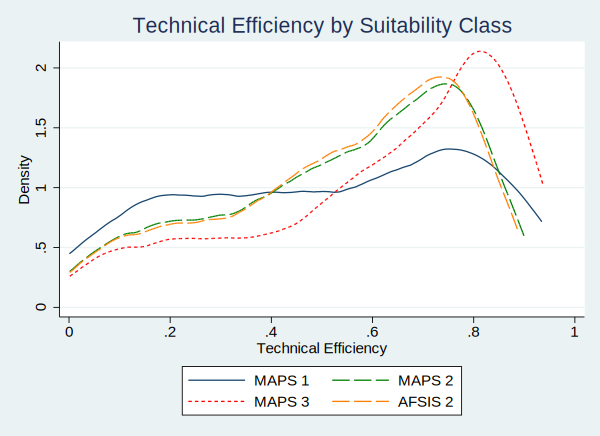

In [27]:
// generate the figure that plots the technical efficiency for MAPS1-3 and AFSIS 2
twoway (kdensity te_obj_maps_1, color(navy) lpattern(solid))   || ///
       (kdensity te_obj_maps_2, color(green) lpattern(longdash))   || ///
       (kdensity te_obj_maps_3, color(red) lpattern(shortdash))     || ///
       (kdensity te_obj_afsis_2, color(orange) lpattern(longdash)) ,  ///
       legend(label(1 "MAPS 1") label(2 "MAPS 2") label(3 "MAPS 3") label(4 "AFSIS 2"))  ///
       xtitle("Technical Efficiency") ytitle("Density")  ///
       title("Technical Efficiency by Suitability Class")


 - ✍️ <span style="color:red"> your plot is a bit off </span>


## D6.6 replicate Table 5
- You simply need  to calculate the averages of all the variables you generated in steps D6.1-D6.4 then find a way to present them in a table format. 
- You can ignore the last 3 rows of Table 5

In [28]:
* Columns 1 and 5
foreach i in maps afsis {
qui mean te_obj_`i' potential_output_obj_`i' potential_yield_obj_`i' cc_quant cc_yield 
matrix define potential_`i'=e(b)'
}

In [29]:
* 2nd column
qui mean te_obj_maps_1 potential_output_obj_maps_1 potential_yield_obj_maps_1 cc_quant cc_yield 
matrix define potential_maps_1=e(b)'


In [30]:
* Columns 3 and 6

foreach i in maps afsis {
qui mean te_obj_`i'_2 potential_output_obj_`i'_2 potential_yield_obj_`i'_2 cc_quant cc_yield 
matrix define potential_`i'_2=e(b)'
}


In [31]:
* 4th column
qui mean te_obj_maps_3 potential_output_obj_maps_3 potential_yield_obj_maps_3 cc_quant cc_yield 
matrix define potential_maps_3=e(b)'


In [32]:
// Create a matrix to store all matrices side by side
matrix potential_combined = potential_maps, potential_maps_1, potential_maps_2, potential_maps_3, potential_afsis, potential_afsis_2


In [33]:
// Use estout to display the combined matrices in a nice table
esttab matrix(potential_combined), ///
    cells("mean") ///
    collabels("MAPS all" "MAPS S1" "MAPS S2" "MAPS S3" "AFSIS all" "AFSIS S2" ) ///
    title("Mean Values of Variables") compress 


Mean Values of Variables
----------------------------------------------------------------------
           potenti~d                                                  
            MAPS all   MAPS S1   MAPS S2   MAPS S3 AFSIS all  AFSIS S2
----------------------------------------------------------------------
te_obj_m~s  .5342376  .5126792  .5283411  .5769898   .528707  .5346397
potentia..   287.973  599.9025  264.2563   161.005  289.1151  282.6576
potentia..  1804.273  3008.827  1713.642  1314.564   1811.72  1754.284
cc_quant    175.8335  333.1422  161.9602  97.04306  175.8335  175.0143
cc_yield    1067.972  1614.478   1014.53  827.5009  1067.972  1052.604
----------------------------------------------------------------------


## D6.7 BONUS: Replicate Figure 4

___

**Max 20 points possible + 1 bonus**
1. Max 3 points for completely running code (no errors). ✍️ + 3
    - No errors!
2. Max 1 point for clean code (no useless output). ✍️ + 1
    - This one is 1 or 0. 
    - Great job on hiding unnecessary things.
3. Max 7 points for coding questions ✍️ + 6.7
    - Overall, good work.  
4. Max 7 points for write-up questions + 4.5
    - Most of your answers are great. See the detailed comments for each answer. 
5. Max 2 points for using markdown efficiently (e.g. math mode when needed, or bullet points, or coloring, etc.) ✍️ + 1
    - There are instances where you should definitely use a mathematical expression but you have not. 
6. Max 1 point for the bonus question ✍️ +0
    - Comment 

**Total: 16.2**